In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\frac{\partial u}{\partial t} = D_u \frac{\partial ^2 u}{\partial x^2} + \alpha u - \beta u v$

$\frac{\partial v}{\partial t} = D_v \frac{\partial ^2 v}{\partial x^2} + \delta u v - \gamma v$

$u(x = 0, t) = v(x = L, t) = 0$

$u(x, t = 0) = 0$ #This can change

$y = [u,v]^T$

$
A = 
\begin{bmatrix}
D_u L + \alpha I & 0 \\
0 & D_v L - \gamma I
\end{bmatrix}
$

$
g(y,t) = 
\begin{bmatrix}
-\beta(t) (u \odot v) \\
\delta(t) (u \odot v)
\end{bmatrix}
$

$f(y,t) = \dot y = Ay + g(y)$

$y_{n+1} = y_{n} + \frac{\Delta t}{2}(f(t_n, y_n) + f(t_{n+1},y_{n+1}))$

$y_{n+1} = y_n + \frac{\Delta t}{2}(Ay_n + Ay_{n+1} + g_n + g_{n+1})$

$(I - \frac{\Delta t}{2} A)y_{n+1} = (I + \frac{\Delta t}{2}A)y_n + \frac{\Delta t}{2}(g_n + g_{n+1})$

$y_{n+1} = (I - \frac{\Delta t}{2} A)^{-1}(I + \frac{\Delta t}{2}A)y_n + \frac{\Delta t}{2}(I - \frac{\Delta t}{2} A)^{-1}(g_n + g_{n+1})$

for $g_{n+1}$

$u_{n+1} = u_n + \Delta t g_n$

$v_{n+1} = v_n + \Delta t g_n$

In [13]:
def A_matrix(n):
    A = np.eye(n) * -2.0
    for i in range(n - 1):
        A[i, i+1] = 1.0
        A[i+1, i] = 1.0
    return A


def solve_lotka_volterra_IBVP(alpha, beta, delta, gamma, L, D_u, D_v, T, N, delta_t, y0):
    x = np.linspace(0, L, N + 1)   
    dx = x[1] - x[0]
    x_int = x[1:-1]

    M = len(x_int)

    A = A_matrix(M) / dx**2

    C_left_u = np.eye(M) - (delta_t/2)*A*D_u
    C_right_u = np.eye(M) + (delta_t/2)*A*D_u
    C_right_v = np.eye(M) + (delta_t/2)*A*D_v
    C_left_v = np.eye(M) - (delta_t/2)*A*D_v

    u0, v0 = y0
    u_int = u0[1:-1]
    v_int = v0[1:-1]
    Y = [(np.pad(u_int,1,constant_values=0),np.pad(v_int, 1, constant_values=0))]
    Nt = int(T/delta_t)

    for k in range(Nt):
        u_int, v_int = Y[-1]
        u_curr, v_curr = u_int[1:-1], v_int[1:-1]
        u_guess = u_curr + delta_t*(alpha*u_curr - beta*u_curr*v_curr)
        v_guess = v_curr + delta_t*(delta*u_curr*v_curr - gamma*v_curr)

        t = k * delta_t
        rhs_u = (C_right_u @ u_curr) + (delta_t/2)*(alpha*u_curr - beta*u_curr*v_curr + alpha*u_guess - beta*u_guess*v_guess)
        rhs_v = (C_right_v @ v_curr) + (delta_t/2)*(delta*u_curr*v_curr - gamma*v_curr + delta*u_guess*v_guess - gamma*v_guess)
        
        u_new = np.linalg.solve(C_left_u, rhs_u)
        v_new = np.linalg.solve(C_left_v, rhs_v)
        Y.append((np.pad(u_new, 1, constant_values=0),np.pad(v_new, 1, constant_values=0)))

    return np.array(Y), Nt + 1, x


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

U, Nt, x_points = solve_lotka_volterra_IBVP(1, 0.5, 0.5, 1, 10, 0.01, 0.01, 100, 1000, 0.01, (np.ones(1001), np.ones(1001)))




C:\Users\aeron\AppData\Local\Temp\ipykernel_26072\3144685556.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


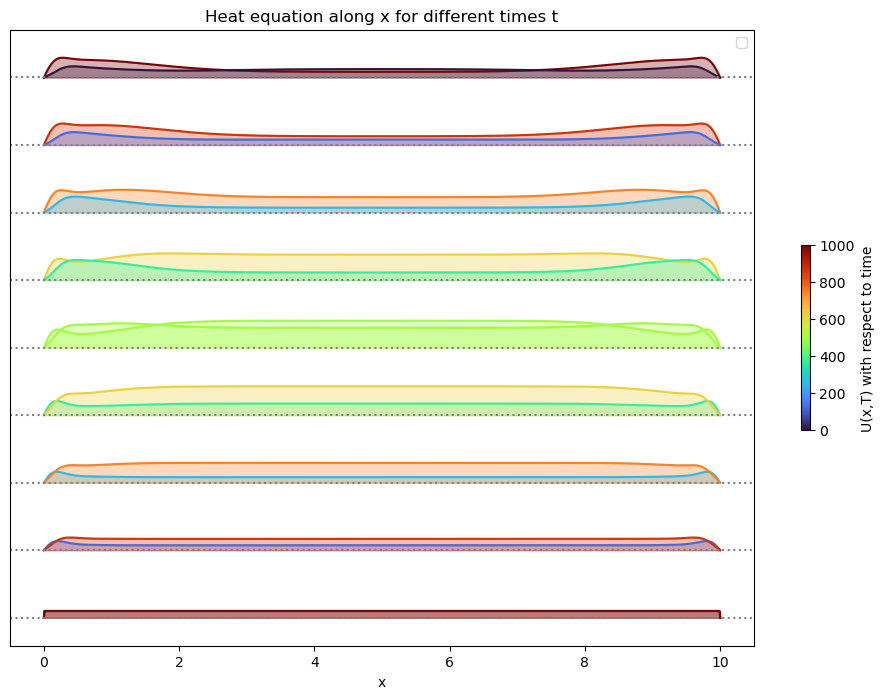

In [29]:
t_vals = np.linspace(0, 1000, Nt)

U = np.asarray(U)
Nt = U.shape[0]
plt.figure(figsize=(12,8))
colors = mpl.cm.turbo_r(np.linspace(0, 1, Nt))
offset = 1.25
ticks = []
for k in range(0, Nt, 1250):
    spacer = offset*k/625
    t = t_vals[k] 
    u_num, v_num = U[k]
    u_num = u_num/4 + spacer
    v_num = v_num/4 + spacer
    plt.plot(x_points, u_num, color = colors[-k])
    plt.fill_between(x_points, u_num, spacer, color=colors[-k], alpha=0.3)
    plt.plot(x_points, v_num, color = colors[k])
    plt.fill_between(x_points, v_num, spacer, color=colors[k], alpha=0.3)
    plt.axhline(spacer, color='grey', linestyle=':')
    ticks.append(spacer)
plt.xlabel("x")
ax = plt.gca(); ax.yaxis.set_visible(False)
plt.title("Heat equation along x for different times t")
cmap = mpl.cm.turbo
norm = mpl.colors.Normalize(vmin=t_vals.min(), vmax=t_vals.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="U(x,T) with respect to time", shrink=0.3)
plt.legend()
plt.show()
